# Лабораторная 11.9.5 (Макарова Мария)

In [350]:
import numpy as np
import math
import matplotlib.pyplot as plt


Само уравнение:
y" – P(x)y = f(x)

Теория взята со страниц 88-90 в задачнике

In [351]:
def P(x):
    return(10+np.sin(2*np.pi*x))

def f(x):
    return(np.cos(2*np.pi*x))

In [352]:
h=0.005
N=1000


In [353]:
alpha = [0]*(N+1)
beta = [0]*(N+1)
gamma = [0]*(N+1)
b=[0]*(N+1)
phi = [0]*(N+1)
mu=[0]*(N+1)
nu = [0]*(N+1)


Нахожу первые прогоночные коэффициенты:

In [354]:
alpha[1]=1/(2+P(0)*h*h)
beta[1]=- (f(0)*h*h)/((2+P(0)*h*h))
gamma[1]=1/(2+P(0)*h*h)

Рекуррентно нахожу остальные:

In [355]:
for i in range (1,N):
    alpha[i+1]=1/(2+P(i*h)*h*h - alpha[i])
    beta[i+1]=(beta[i] - f(i*h)*h*h)/(2+P(i*h)*h*h - alpha[i])
    gamma[i+1]=( gamma[i] ) /(2+P(i*h)*h*h - alpha[i])

In [356]:
alpha[N]

0.9847154512938936

Теперь прогонка справа налево:

In [357]:
mu[N]= -1/(alpha[N] + gamma [N] - (2+P(N*h)*h*h) )
nu[N]= (f(N*h)*h*h - beta[N]) / (alpha[N]+gamma[N] -(2+ P(N*h)*h*h))
#nu[N]= (f(N*h)*h*h - beta[N]) / (alpha[N]+gamma[N] - P(1-h)*h*h)

In [358]:
for i in range (N,0,-1):
    mu[i-1]=alpha[i]*mu[i] + gamma[i]*mu[N]
    nu[i-1]=beta[i] + alpha[i]*nu[i]+gamma[i]*nu[N]

Теперь строю функцию во всех точках сетки:

In [359]:
y=[0]*(N)

In [360]:
y[0]=nu[0]/(1-mu[0])


In [361]:
for i in range(2,N+1,1):
    y[i-1] = alpha[i]*(mu[i] * y[0] + nu[i])+beta[i] + gamma[i]*(mu[N]*y[0]+nu[N])

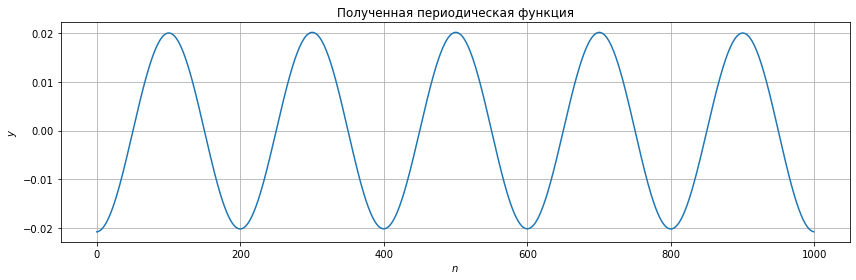

In [362]:
k = np.linspace(0,N-1,N)
plt.figure(figsize=[12, 4])
plt.plot(k, y)
plt.title("Полученная периодическая функция")
plt.xlabel("$n$")
plt.ylabel("$y$")
plt.grid()

plt.tight_layout() 
plt.show()

ПРОВЕРКА ^ 

In [363]:
A = np.zeros((N+1,N+1))
j=0;
for i in range(N-1):
    A[i+1][j]=1;
    A[i+1][j+1] = - (2 + P((i+1)*h)*h*h) ; 
    # A[i][j+1] = 1
    A[i+1][j+2]=1
    j=j+1;   
    
A[0][0] =   - (2 + P(0)*h*h)
A[0][1]=1
A[0][N]=1
A[0][2]=0;
A[N][0] = 1
A[N][N-1]=1
A[N][N]= - (2 + P(N*h)*h*h)

In [364]:
fi=np.zeros(N+1)
for i in range(N):
    fi[i]=f(i*h)*h*h

In [365]:
y = np.linalg.solve(A,(fi))

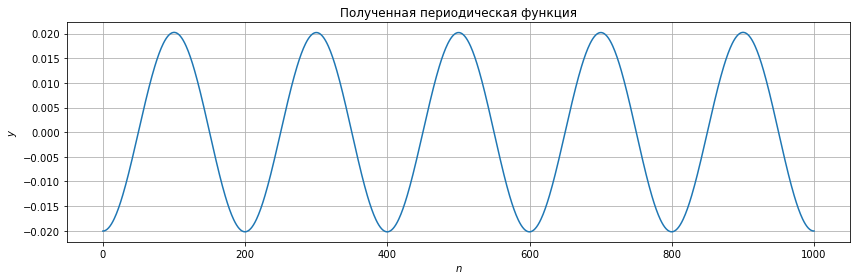

In [366]:
k = np.linspace(0,N,N+1)
plt.figure(figsize=[12, 4])
plt.plot(k, y)
plt.title("Полученная периодическая функция")
plt.xlabel("$n$")
plt.ylabel("$y$")
plt.grid()

plt.tight_layout() 
plt.show()